In [1]:
%config IPCompleter.greedy=True



# Clothing-Item-Recognizer

#### Importing fashion datasets

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
print(tf.__version__)

2.0.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.fashion_mnist
type(mnist)

module

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
np.max(x_train)

255

In [8]:
np.mean(x_train)

72.94035223214286

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data exploration

In [11]:
x_test.shape

(10000, 28, 28)

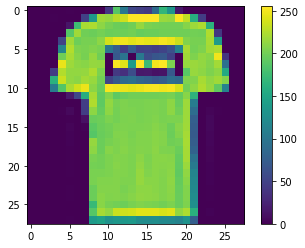

In [12]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
x_train = x_train/255.0

In [15]:
x_test = x_test/255.0

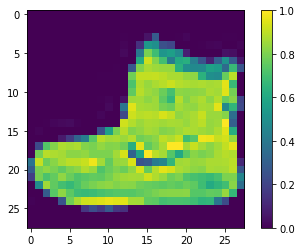

In [16]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

#### Build model with TF

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

Flatten layer transforms data from two dimensional into one dimensional.
Frist Dense layer states how many neurons(nodes) we want to pass in, and the activation function.
Second Dense layer output layer, define how many outputs there are (10 because of 10 types of clothings).

In [18]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Model compilation

- Loss function (measure how accurate the model is during training and testing; minimizes error during training)
- Optimizer (how model updates based on data
- Metrics

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 356us/sample - loss: 0.5016 - accuracy: 0.8210 - val_loss: 0.4170 - val_accuracy: 0.8493
Epoch 2/10
48000/48000 [==============================] - 16s 326us/sample - loss: 0.3774 - accuracy: 0.8625 - val_loss: 0.3673 - val_accuracy: 0.8673
Epoch 3/10
48000/48000 [==============================] - 16s 326us/sample - loss: 0.3399 - accuracy: 0.8745 - val_loss: 0.3537 - val_accuracy: 0.8737
Epoch 4/10
48000/48000 [==============================] - 16s 328us/sample - loss: 0.3149 - accuracy: 0.8831 - val_loss: 0.3270 - val_accuracy: 0.8805
Epoch 5/10
48000/48000 [==============================] - 16s 327us/sample - loss: 0.2979 - accuracy: 0.8883 - val_loss: 0.3361 - val_accuracy: 0.8802
Epoch 6/10
48000/48000 [==============================] - 16s 328us/sample - loss: 0.2841 - accuracy: 0.8940 - val_loss: 0.3471 - val_accuracy: 0.8776
Epoch 7/10
48000/48000 [====================

In [22]:
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.8752


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
y_pred = model.predict_classes(x_test)

In [25]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [26]:
accuracy_score(y_test, y_pred)

0.8752

In [27]:
pred = model.predict(x_test)

In [28]:
pred

array([[8.5033612e-12, 9.5799975e-14, 3.3761476e-14, ..., 9.6634421e-03,
        1.1206782e-12, 9.9032623e-01],
       [1.2721874e-06, 5.7071826e-14, 9.9956816e-01, ..., 1.4156201e-15,
        3.8596064e-09, 1.6196386e-16],
       [5.9828645e-13, 1.0000000e+00, 4.1607159e-20, ..., 6.1260698e-30,
        5.1930098e-20, 5.4706198e-27],
       ...,
       [3.9185794e-05, 5.5454350e-13, 9.2173025e-07, ..., 9.7117864e-14,
        9.9949038e-01, 5.1925949e-15],
       [1.5683116e-10, 9.9999630e-01, 5.7601246e-12, ..., 1.8274761e-15,
        4.4734914e-11, 6.2753730e-13],
       [2.2202157e-07, 1.2951842e-10, 2.8421578e-08, ..., 1.7181411e-04,
        1.8428278e-05, 1.5731448e-06]], dtype=float32)

In [29]:
np.argmax(pred[0])

9

#### Plotting learning curve 

In [30]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dens

In [31]:
history

In [32]:
history.history

{'loss': [0.5015638889748758,
  0.3773583572447266,
  0.3399432653017478,
  0.31492671221472845,
  0.29786389599966545,
  0.2840692382637644,
  0.26908016620853836,
  0.2585276693417442,
  0.24970589014663802,
  0.24318614030589894],
 'accuracy': [0.8209583,
  0.86245835,
  0.87452084,
  0.883125,
  0.8883333,
  0.89404166,
  0.8979375,
  0.90358335,
  0.9070625,
  0.9092708],
 'val_loss': [0.41702228961279614,
  0.36731693731698517,
  0.3536514288235533,
  0.32698970175736275,
  0.33608912283258785,
  0.34712327967242645,
  0.33895767544173094,
  0.33601260851331366,
  0.3363960904121632,
  0.33793507719344534],
 'val_accuracy': [0.84925,
  0.86725,
  0.87366664,
  0.8805,
  0.88025,
  0.8775833,
  0.87908334,
  0.8804167,
  0.88591665,
  0.883]}

In [33]:
import matplotlib.pyplot as plt

Model is overfitting if validation accuracy is greater than accuracy

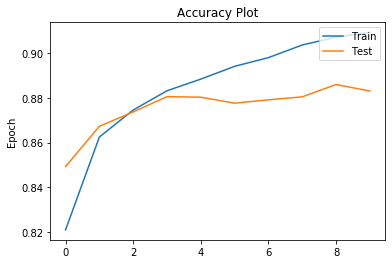

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Plot")
plt.ylabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

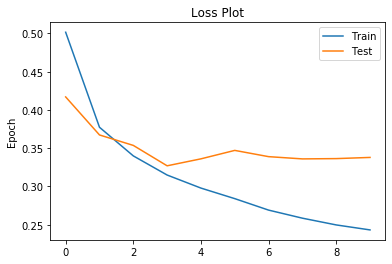

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Plot")
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

#### Plot confusion matrix

In [50]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2592bd98648>)

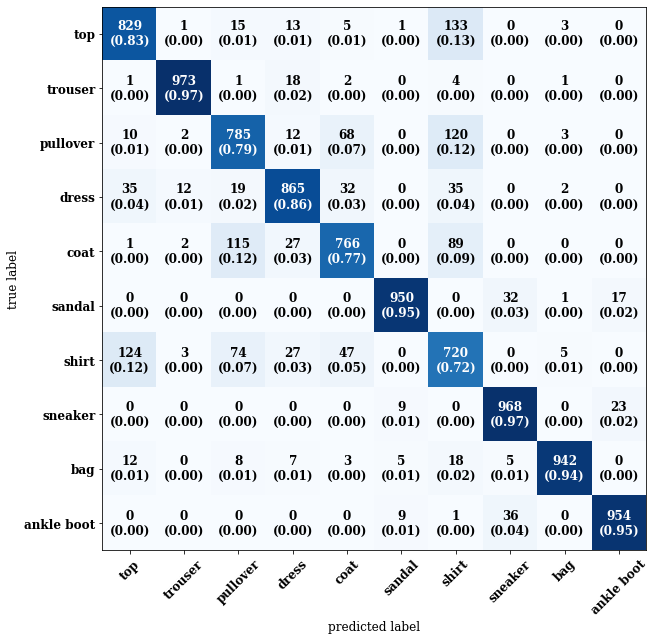

In [58]:
mat = confusion_matrix(y_test, y_pred)
font = {
    'family': 'serif',
    'weight': 'bold',
    'size': 12,
}
matplotlib.rc('font', **font)
plot_confusion_matrix(conf_mat = mat, figsize = (10,10), class_names = class_names, show_normed = 'true')